# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [9]:
# Importing the libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math

In [10]:
# Importing the dataframe
df = pd.read_csv('human_body_temperature.csv')

In [11]:
# To calculate the total variance
def calc_variance(temp_list):
    variance = 0
    for temp in temp_list:
        variance = variance + (mean_df - temp) ** 2
    return variance / len(temp_list)

temp = df.temperature

# Quick check to determine if data is normal
print 'If data is normal, the mean, median, and mode will all be equal'
mean_df = temp.mean() # to calculate the mean temperature
median_df = temp.median() # to calculate the middle temperature
mode_df = float(temp.mode()) # to calculate the most frequent temperature
variance = float(calc_variance(temp))
std_dev = math.sqrt(variance)

print 'The mean is %s' % (mean_df)
print 'The median is %s' % (median_df)
print 'The mode is %s' % (mode_df)
print 'The variance is %s' % (variance)
print 'The standard deviation is %s' % (std_dev)

If data is normal, the mean, median, and mode will all be equal
The mean is 98.2492307692
The median is 98.3
The mode is 98.0
The variance is 0.533422485207
The standard deviation is 0.730357778905


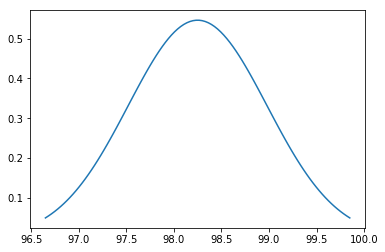

In [12]:
# Plotting the distribution
mu = float(mean_df)
x = np.linspace(mu-3*variance, mu+3*variance, 100)
plt.plot(x, mlab.normpdf(x,mu,std_dev))
plt.show()

In [9]:
# To determine necessary sample size
pass

In [10]:
# To determine independence
pass

In [13]:
# To determine the true population mean
# One sample t test using the t statistic
population_mean = 98.6
sample_size = math.sqrt(130)
t_value_single = (mu - population_mean) / (std_dev / sample_size)
t_table_value = stats.t.ppf(.95, 130)
if abs(t_value_single) > abs(t_table_value):
    print 'I am 95% confident that the true population mean is around 98.6'

I am 95% confident that the true population mean is around 98.6


In [14]:
# Considering someone's temperature to be 'abnormal'
# Using a 95% confidence interval
confidence_value_high = mu + (1.96*std_dev)
confidence_value_low = mu - (1.96*std_dev)
print "It would be abnormal if someone's temperature was above %s or below %s" % (confidence_value_high, confidence_value_low)

It would be abnormal if someone's temperature was above 99.6807320159 or below 96.8177295226


In [15]:
# Differentiating between male and female
temp_df_gen = df[['temperature', 'gender']]
temp_df_male = temp_df_gen[temp_df_gen.gender == 'M']
temp_df_female = temp_df_gen[temp_df_gen.gender == 'F']

In [18]:
# To calculate the total variance for males
def calc_variance_male(temp_list):
    variance = 0
    for temp in temp_list:
        variance = variance + (mean_df_male - temp) ** 2
    return variance / len(temp_list)

# Quick check to determine if male data is normal
temp_list_male = temp_df_male.temperature
print 'If data is normal, the mean, median, and mode will all be equal'
mean_df_male = float(temp_df_male.mean()) # to calculate the mean temperature
median_df_male = float(temp_df_male.median()) # to calculate the middle temperature
mode_df_male = temp_df_male.mode().temperature.mean() # to calculate the most frequent temperature
variance_male = calc_variance_male(temp_list_male)
std_dev_male = math.sqrt(float(variance_male))

print 'The mean is %s' % (mean_df_male)
print 'The median is %s' % (median_df_male)
print 'The mode is %s' % (mode_df_male)
print 'The variance is %s' % (variance_male)
print 'The standard deviation is %s' % (std_dev_male)

If data is normal, the mean, median, and mode will all be equal
The mean is 98.1046153846
The median is 98.1
The mode is 98.3
The variance is 0.480747928994
The standard deviation is 0.693359884183


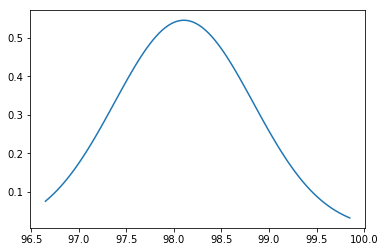

In [19]:
# Plotting male distribution
mu_male = float(mean_df_male)
x_male = np.linspace(mu_male-3*variance, mu_male+3*variance, 100)
plt.plot(x, mlab.normpdf(x,mu_male,std_dev))
plt.show()

In [23]:
# To calculate the total variance for females
def calc_variance_female(temp_list):
    variance = 0
    for temp in temp_list:
        variance = variance + (mean_df_female - temp) ** 2
    return variance / len(temp_list)

# Quick check to determine if female data is normal
temp_list_female = temp_df_female.temperature
print 'If data is normal, the mean, median, and mode will all be equal'
mean_df_female = float(temp_df_female.mean()) # to calculate the mean temperature
median_df_female = float(temp_df_female.median()) # to calculate the middle temperature
mode_df_female = float(temp_df_female.mode().temperature) # to calculate the most frequent temperature
variance_female = float(calc_variance(temp_list_female))
std_dev_female = math.sqrt(variance)

print 'The mean is %s' % (mean_df_female)
print 'The median is %s' % (median_df_female)
print 'The mode is %s' % (mode_df_female)
print 'The variance is %s' % (variance_female)
print 'The standard deviation is %s' % (std_dev_female)

If data is normal, the mean, median, and mode will all be equal
The mean is 98.3938461538
The median is 98.4
The mode is 98.8
The variance is 0.565183431953
The standard deviation is 0.730357778905


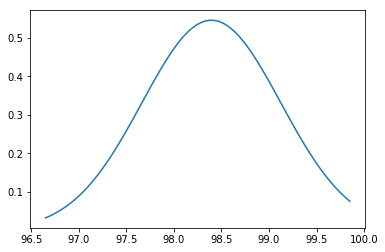

In [24]:
# Plotting female distribution
mu_female = float(mean_df_female)
x_female = np.linspace(mu_female-3*variance, mu_female+3*variance, 100)
plt.plot(x, mlab.normpdf(x,mu_female,std_dev))
plt.show()

In [29]:
# To determine the true population mean
# Two sample t test using the t statistic
population_mean = 98.6
sample_size = math.sqrt(130)
t_value_double = (mu_male - mu_female) / math.sqrt((variance_male / 65) + (variance_female / 65))
t_table_value_double = stats.t.ppf(.975, 130)
if abs(t_value_double) > abs(t_table_value_double):
    print 'I am 95% confident that the true population mean is around 98.6'

I am 95% confident that the true population mean is around 98.6
